# Analyzing Enron Mail Dataset Using K-Means

*by Nicole Kacirek, David Madden, and Girik Ranchhod. *
*May 9, 2018*

## Introduction

It seems like every day in the news, there is another company that is in the media spotlight, for some reason or another. Most of the time there is nothing that happens to these companies other than some bad publicity, but a few catch more flak than others and their empire crumbles down to ruins. We wanted to look at a well known example of those crumbling empires and apply our knowledge of machine learning to see if we can pick out the point where things started to spiral out of control. Using K-Means, an email database, and Python, we’ve set out with the task of analyzing the Enron email database that was acquired during their final days as a corporation. Using K-Means, we will be analyzing all of the emails in the data set to then identify abnormal behavior from the emails that are outliers from norm.

Enron, an energy, commodities, and service company based out of Houston, Texas is home to one of the most dramatic rise and falls of corporate America. Enron started off by a merger between two small regional companies in in 1985 and soon became to generate “revenues of nearly $101 billion during 2000” (https://en.wikipedia.org/wiki/Enron[https://en.wikipedia.org/wiki/Enron). After being named the most innovative company for six consecutive years, Enron’s downfall began in 2001 when it was revealed that it’s initial and current financial condition was nothing but an elaborate accounting fraud. It was discovered that much of Enron’s recorded assets and profits were either inflated or nonexistent. Enron filed for bankruptcy in 2001 and the company soon moved to change its name, under a new board of directors, and sold off its remaining assets. While Enron might not exist any more today, what was left behind by the corporation giant is a legacy of corruption and a large real world database of emails.

The Enron scandal brought to light many accounting practices of many US corporations, and a dataset containing “500 thousands emails between 150 former employees” (https://elitedatascience.com/machine-learning-projects-for-beginners#stock-prices). The dataset was made public and posted to the web, by the Federal Energy Regulatory Commission during its investigation into Enron and was prepared by the “CALO Project (A Cognitive Assistant that Learns and Organizes)” (https://www.cs.cmu.edu/~enron/). The data is now owned by a researcher at MIT, where it is continually used by the public for research and other purposes. While the dataset does not contain any attachments, and some emails being deleted by request by affected employees, the dataset essentially contains every email ever sent by mostly senior management. Many of the emails are not necessarily business related, as some are personal messages or just forward chains being passed around the office. The database also includes information that would be found in an email account, such as notes, and contacts. For this project we will be focusing on just the emails found in the database, namely the emails that are being sent. Since the database contains emails from mainly upper management, our thought process is that many of the sent messages found will most likely also be found in the recieved messages for other users. While looking over random accounts, we saw that some accounts were receiving messages that were either spam, personal emails such as looking for properties, or weekly news flashes. These kinds of emails we did not care about as it did not pertain to our goal in hand, hence our decision to focus on sent emails only. For each sent email, common information was found like who the email was going to, who it was from, the subject, the time sent, and the message itself. We extracted the sender, the recipient, and the time metadata from each email  datapoint and wrote that to a CSV file. 

In machine learning, there exists multiple ways to cluster, and analysis data. K-Means is a popular unsupervised learning algorithm with the means to achieve cluster analysis. It does so by partitioning the data into k clusters where each observation belongs to the cluster that has the nearest mean. In layman's terms, K-Means tries to group the data that are similar into clusters. Since it is an unsupervised learning algorithm, there is no need for the algorithm to classify its output or reapply the output as an additional input such as in a neural network. Using iterations, we compute and create cluster centroids and continues refine the values until the changes are very small. Through the use of K-Means, the ability to find outliers in the data becomes significantly easier. As described before, we had to preprocess the data before it could be passed into our K-Means methods. After removing the unnecessary information, the K-Means algorithm we implemented uses five clusters to create our centroids and generalize our data.

### Data Visualization

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas
import numpy as np
from datetime import datetime
%matplotlib inline

In [3]:
data = pandas.read_csv('example.csv')
data = data.drop(['to', 'from'], axis=1)
data = np.array(data)
names = ['day', 'month', 'year', 'hour']


def plot_against_hour():
    plt.figure(figsize=(20, 20))
    X = data[:, 0:3]
    T = data[:, 3]
    Xnames = names[0:3]
    Tname = names[3]
    for c in range(X.shape[1]):
        plt.subplot(3, 3, c + 1)
        plt.plot(X[:, c], T, 'o', alpha=1.0)
        plt.ylabel(Tname)
        plt.xlabel(Xnames[c])
    plt.show()


def plot_against_year():
    plt.figure(figsize=(20, 20))
    X = np.column_stack((data[:, 0:2], data[:, 3]))
    T = data[:, 2]
    Xnames = np.hstack((names[0:2], names[3]))
    Tname = names[2]
    for c in range(X.shape[1]):
        plt.subplot(3, 3, c + 1)
        plt.plot(X[:, c], T, 'o', alpha=1.0)
        plt.ylabel(Tname)
        plt.xlabel(Xnames[c])
    plt.show()

def plot_hour_against_date():
    plt.figure(figsize=(20, 20))
    Xtemp = data[:, 0:3]
    list_of_datetimes = []
    T = data[:, 3]
    Tname = names[3]
    for x in Xtemp:
        xString = np.array2string(x, precision=1, suppress_small=True)
        xString = " ".join(xString.split()).replace("[", "").replace("]", "").lstrip()
        list_of_datetimes.append(datetime.strptime(xString, "%d %m %Y"))

    X = list_of_datetimes

    plt.gcf().autofmt_xdate()
    myFmt = mdates.DateFormatter("%m/%d/%Y")
    plt.gca().xaxis.set_major_formatter(myFmt)

    plt.plot(X, T, 'o', alpha=1.0)
    plt.ylabel(Tname)
    plt.xlabel("Date: m/d/y")
    plt.show()

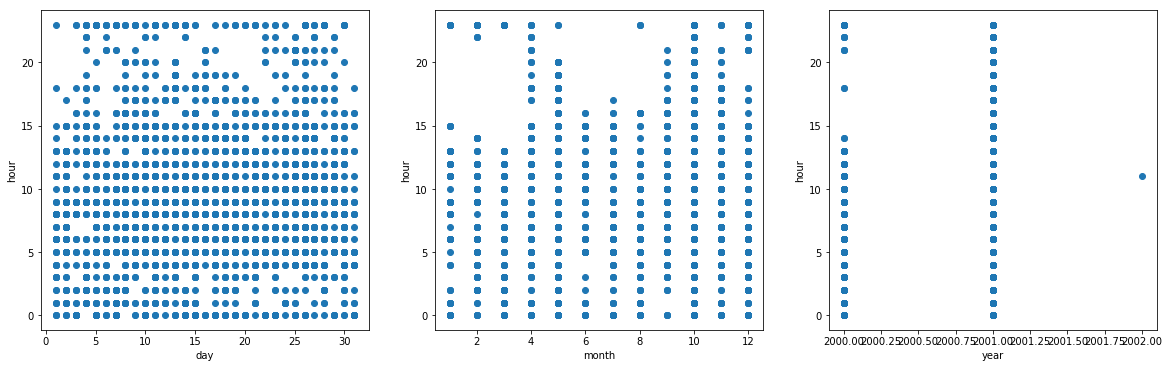

In [4]:
plot_against_hour()

To get a better understanding of the data and its correlation to itself, the data was graphed against different attributes of the date stamp for each email data point. Each date stamp was stored including the hour, day, month, and year. To see if there existed any linearity in the data, there were multiple graphs created with each one having a different y axis variable being graphed. The first focused on the hour attribute of the date being graphed against the day, month, and year. The results are nothing surprising, as we pretty much expected since emails are going to be sent all throughout the day. What was interesting is that during the summer and early parts of the year, it can be seen that there are not many emails being sent late in the day during the early parts of the year and during the summer. This could be for numerous amount of reasons, but most likely because most people aren’t in the office that late especially in the summer. With the scandal being first questioned in 2001, and then being brought to light in 2002, it can be seen that the number of emails sent during the day at different hours fastly increased in 2001 and then in 2002, the frequency during the day dropped off immediately.

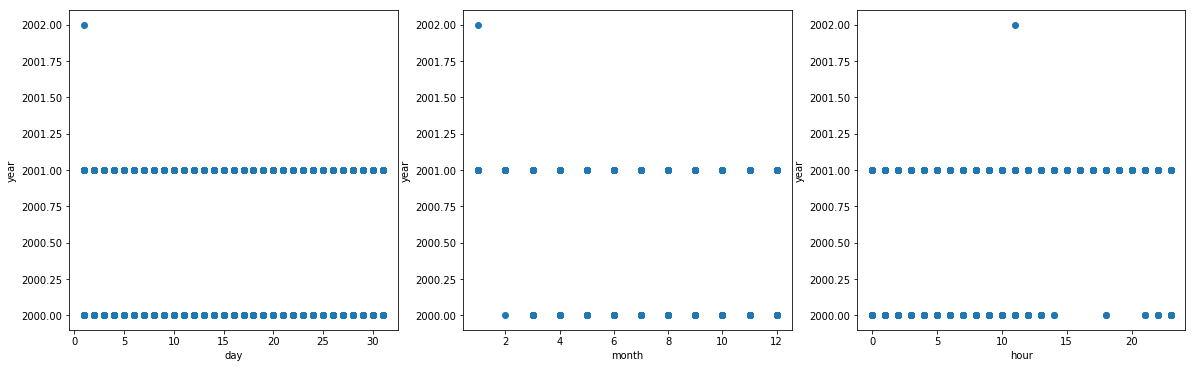

In [5]:
plot_against_year()

When plotting the different attributes of the date against the year, it can be seen that the emails were being sent at a steady rate over the year in 2000 except for late hours. When 2001 hit, rate of emails became more consistent throughout the year for every hour, month, and day. Like mentioned above when the scandal broke in the news in 2002 it seems like there was only one email, or at least emails only occured on one day of the month within a single hour. This could most likely be a senior member of management sending out one final email before Enron closed its doors for good.

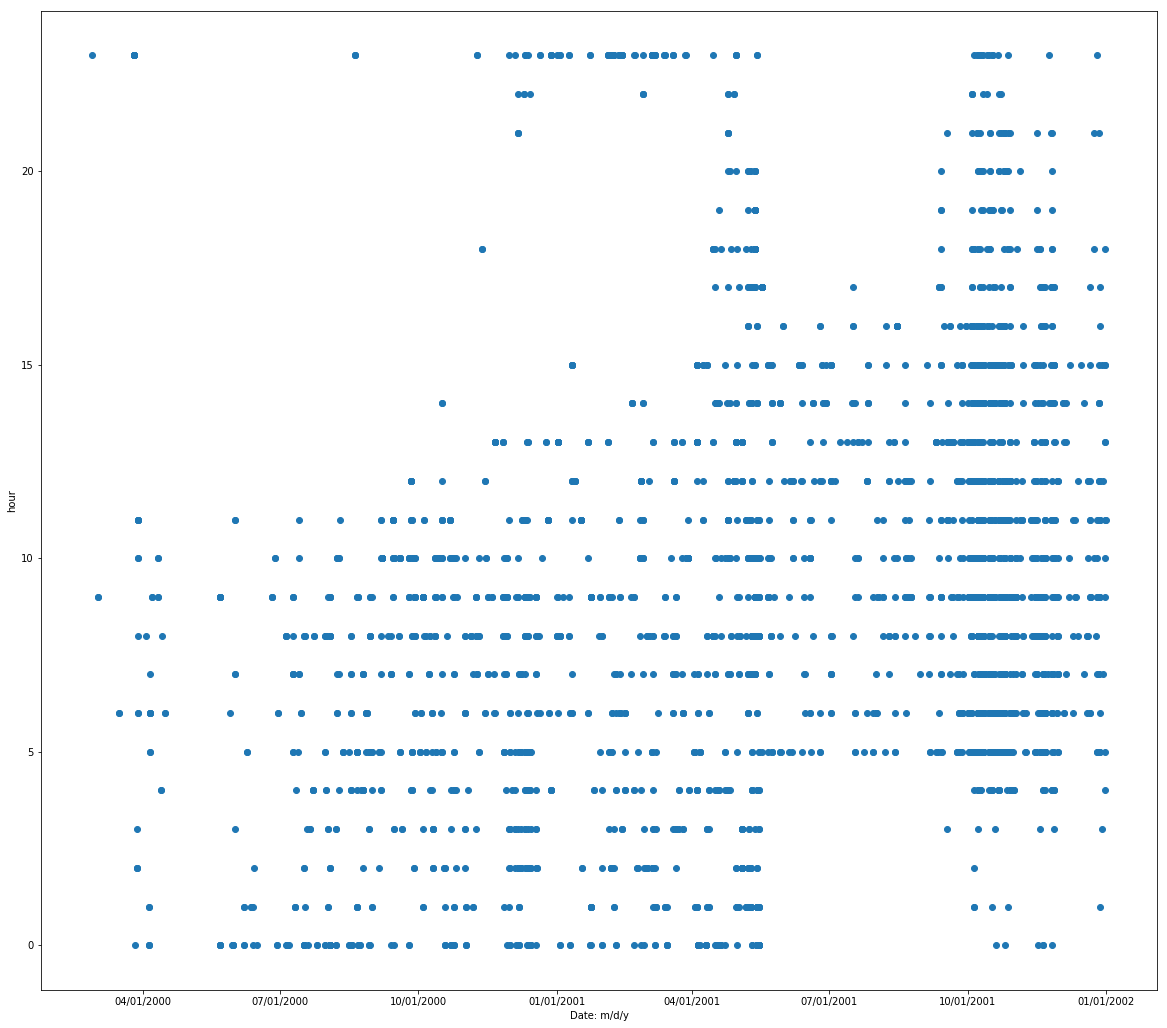

In [6]:
plot_hour_against_date()

The last graph the was plotted before implementing K-Means included plotting the hour against the date for every email that was sent in the data set. This graph provided the best insight into the data, and the best idea of what our K-Means algorithm was going to be able to tell us. It can be seen that there exists a slight linear trend in the data. This is interesting considering that the basic idea that this plot is showing us is the time that emails were sent on each day for every data point. Immediately there are some outliers that can be seen, which tend to be around the time that Enron’s business practices were being questioned, and when the scandal broke to the media. The first large spike of emails is roughly around the time period of August 2001, when an analyst wrote a note titled Enron: All stressed up and no place to go, which encouraged investors to sell their stocks in the company. Our K-Means algorithm might be able to show us the same results, since the large spike of emails is outside of the norm that can be observed. The other large spike is roughly around the time leading up to, and during the company announcing bankruptcy which will hopefully like the first spike, also be reported in our K-Means output.

### Results Overview

When analyzing our results we can come to the conclusion that the amount of emails being sent increases drastically as the scandal date of late 2001 comes closer. Simply looking at the amount of emails being sent during a few different months leading up to the scandal being revealed, we can saw that during the 2000s the amount of emails slowly increases overall and it can be seen that the hours of the day start becoming more and more wide spread. This was pretty much expected, as when the scandal broke there was probably a lot of communication about what was going to happen to either the company or the employees. 

## Methods

### Preprocessing

Our overall goal for preprocessing was to read through the 400MB dataset of emails and only grab the information we wanted and then since we felt like using pandas would allow us to parse the data the easiest, we then decided to write our preprocessing output to a csv file so pandas would have an easy time handling it. 

With that, we start by going through every directory, their subdirectories and all the files within those directories which contain an email. Once we have the email we then use a library called email parser and use that to grab the to, who the email is being sent to, the from, who is receiving the email, and the date. We organize this specific information into their own lists. Next we iterated through each of these lists and created a date in the format we wanted, so instead of using Apr. we would then convert that to a 4. Now our date is in the format we want so we can begin constructing our csv file by writing ‘to’, ‘from’, ‘day’, ‘ month’, ‘year’, and ‘hour’. With our custom csv file written, we’re now able to parse the csv with pandas and continue on with our work.

In [7]:
import os
from email.parser import Parser

In [8]:
def parse_email(inputfile, to_email_list, from_email_list, date_list):
    with open(inputfile, "r", encoding='latin-1') as f:
        data = f.read()

    email = Parser().parsestr(data)

    if email['to']:
        email_to = email['to']
        email_to = email_to.replace("\n", "")
        email_to = email_to.replace("\t", "")
        email_to = email_to.replace(" ", "")
        email_to = email_to.split(",")

        for email_to_1 in email_to:
            to_email_list.append(email_to_1)

    from_email_list.append(email['from'])
    date_list.append(email['date'])


def preprocess():
    rootdir = "/Users/girikranchhod/School/CS445/term_project/input/maildir"
    to_email_list = []
    from_email_list = []
    date_list = []

    month_dict = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10,
                  "Nov": 11,
                  "Dec": 12}

    file = open("enron.csv", "w+")

    for directory, subdirectory, filenames in os.walk(rootdir):
        for filename in filenames:
            parse_email(os.path.join(directory, filename), to_email_list, from_email_list, date_list)

    for to_email, from_email, date_email in zip(to_email_list, from_email_list, date_list):
        date = date_email.split('-')[0][:-10]
        date = date[5:]
        dayMonthYear = date.split(' ')
        day = str(dayMonthYear[0])
        month = str(month_dict[dayMonthYear[1]])
        year = str(dayMonthYear[2])
        date = str(day) + '/' + str(month) + '/' + str(year)
        time = date_email.split('-')[0].split(' ')[4]
        file.write(
            to_email + ',' +
            from_email + ',' +
            day + ',' +
            month + ',' +
            year + ',' +
            time.split(':')[0] + '\n')

Note: if you want to run this yourself, you will need to change the root directory in the preprocess method.

### Implementing K-means

In [9]:
import pandas as pd
from matplotlib import style
from datetime import date
from datetime import timedelta

In [10]:
style.use('ggplot')

In [18]:
class k_Means:

    # constructor
    def __init__(self, k=5, tolerance=.0001, max_iterations=500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        self.centroids = {}

        
    def parseData(self, file):
        df = pd.read_csv(file)
        X = df.values
        return X

    
    def splitData(self, data):
        data = data[:, 2:]
        for x in data:
            trydate = datetime(x[2], x[1], x[0], x[3])
            x[3] = trydate
        data = data[:, 3:]
        return data

    
    def dateTimeDistance(self, features):
        distances = [np.linalg.norm(((features[0] - self.centroids[centroid][0]).days * 24) + (
                (features[0] - self.centroids[centroid][0]).seconds / 3600.0)) for centroid in self.centroids]
        return distances

    
    def dateTimeAverage2(self, chunk):
        base = np.min(chunk)
        datesSum = timedelta(0)
        for i in range(len(chunk)):
            datesSum += (chunk[i][0] - base)

        averageDays = datesSum // timedelta(days=len(chunk))
        averageHours = int(round(((datesSum / timedelta(days=len(chunk))) % 1), 5) * 24)

        averageDate = base + timedelta(days=averageDays, hours=averageHours)
        result = []
        result.append(averageDate)

        return np.array(result)

    
    def chunks(self, l, n):
        for i in range(0, len(l), n):
            yield l[i:i + n]

            
    def initializeCentroids(self, data):
        for i in range(self.k):
            self.centroids[i] = data[i]

            
    # main loop that runs k-means algorithm
    def km_iterations(self, data):
        
        for i in range(self.max_iterations):

            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

            for features in data:
                distances = k.dateTimeDistance(features)
                classification = distances.index(min(distances))
                self.classes[classification].append(features)

            previous = dict(self.centroids)

            for classification in self.classes:
                chunksForAverage = list(k.chunks(self.classes[classification], 100))

                averages = []
                for chunk in chunksForAverage:
                    averages.append(k.dateTimeAverage2(chunk))

                self.centroids[classification] = k.dateTimeAverage2(averages)

            isOptimal = True

            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]

                days = original_centroid[0].day + (original_centroid[0].month * 30) + (original_centroid[0].year * 356)

                if np.sum((curr[0] - original_centroid[0]) / (
                        timedelta(days=days, hours=original_centroid[0].hour)) * 100) > self.tolerance:
                    isOptimal = False

            if isOptimal:
                break

                
    def plot(self):
        plt.figure(figsize=(10, 10))
        colors = 10 * ["r", "g", "c", "b", "k"]

        for centroid in k.centroids:
            data = k.centroids[centroid]
            for point in data:
                plt.scatter(date(point.year, point.month, point.day), point.hour, s=130, marker="x")
        for classification in k.classes:
            color = colors[classification]
            for features in k.classes[classification]:
                for point in features:
                    plt.scatter(date(point.year, point.month, point.day), point.hour, color=color, s=30)
        plt.show()

Our goal of this project was to implement K-means to analyze the time and date of emails sent, and look for anything out of the ordinary (outliers in our clusters). Therefore, we needed to create a working implementation of K-means that would create clusters based on date and time (hour of the day). To do this, we created a k_Means class that invokes the following methods: 

#### Constructor
The constructor has three default parameters. It initializes the number of clusters (k) with the default value of 5. It also initializes the tolerance; this the minimum percentage change we will allow when deciding if we have the best centroids or if we should continue to iterate. Next, it initializes the maximum number of iterations (max_iterations). The K-means main loop will iterate max_iterations number of times in the case that the percentage change between centroids never falls below our tolerance. Finally, it also initializes the dictionary that will store the centroids.

#### parseData
This method uses pandas to read in the csv created during pre-processing. It then converts the dataset returned from pandas into a numpy array and returns it. 

#### splitData
After playing around with k-means and pinpointing our project focus, we decided not to use the to and from email address columns from the csv anymore. Therefore, the splitData method removes the the first two columns in the data numpy array. Then, with the remaining 4 columns, it creates a datetime object and replaces the 4 columns with this single datetime object. This way, k-means will evaluate the values on the date/time scale all together rather than separately on the decimal scale. The method returns the augmented, one-column, numpy array. 

#### dateTimeDistance
This custom helper method calculates the distance between two datetime objects. It takes in an array of features (a numpy array containing one datetime object), and then calculates the distance between the datapoint and each of the centroids in hours. It stores these values in distances in the following fashion:

distances = [hours between feature datetime and first centroid, hours between feature datetime time and second centroid, …… , hours between feature datetime and last centroid]

distances is then returned. 

#### dateTimeAverage2
Similar to dateTimeDistance, dateTimeAverage2 is another helper method to perform math operations on datetime objects. This method specifically finds the average date within a given “chunk” of dates. This method proved to be the most difficult as you cannot simply add two datetime objects together, nor divide two datetime objects from each other. Therefore, to compute the average between dates, we had to make use of timedelta objects. While you cannot add two dates together, you can add a timedelta object to a datetime object to represent a change in date/time. Our algorithm for finding the average datetime is as follows:

1. Find the earliest datetime in the chunk and set this as the ‘’base” datetime. We will compute all time deltas off of this datetime.
2. Initialize a timedelta to 0 (datesSum).
3. Loop through all the dates in the chunk.
    - For each datetime, compute the difference between the current datetime and the base datetime. 
    - Add this timedelta to datesSum.
4. Create a timedelta with days equal to the number of datetime objects in the chunk.
    - Divide the datesSum timedelta by this to get the average difference number of days.
    - Divide the datesSum timedelta by this, and then modulo by 1 to get the average difference number of hours.
5. Add the average differences to the base datetime to get the average datetime for this chunk

Finally, this function puts the average datetime into a numpy array and returns it.

#### chunks
The chunks method is a helper method I found online to break up a numpy array (l) into (n) chunks. This method was needed to prevent an integer overflow error in the dateTimeAverage2 function. By breaking the classes into chunks first, the dateSum value never again exceeded python’s limits.

#### initializeCentroids
This short method is used to initialize the centroids. For our implementation, we chose to simply initialize the k-centroids to the first k-datetime objects. Therefore, it loops through the first k data points and assigns them to the centroids dictionary at the given index. 

#### km_iterations
This method is where the bulk of K-means is implemented. Overall, the method takes the data as a parameter and applies K-means to it. After K-means is complete, self.centroids will contain the final k centroids and self.classes will contain lists of data points associated with each the centroids’ index in the dictionary. The method works as follows:

- The main loop is from 0 to the max_iterations. The code will continue to loop until we are less than self.tolerance or until we’ve hit the max number of iterations. 
- Within the loop, the first thing we do is initialize self.classes to be an empty dictionary. For each centroid, we initialize an empty list to its index. As data points get assigned to centroids, they will be added to the classes list for the corresponding centroid’s index.
- Next, we loop through all of the datetime points in the data. For each datetime feature, we call dateTimeDistance to get the distances in hours from the data point to each of the centroids. We then take the minimum of the k distances and assign the data point to that centroid, adding it to the corresponding classes list. 
- After all the distances are calculated and classes assigned, we store the current centroids in a dictionary (previous) to be used later on.
- Then, we enter another loop to re-calculate the centroids. We now iterate through the classes list for each centroid and find the average datetime of all of the points in the class. To do this, we first break the classes list up into chunks using the chunks method. Then, we initialize an empty averages list. Next we loop through the chunks, and pass each chunk to the dateTimeAverage2 method. We append the averages list with this result and proceed until we’ve calculated the local average for all the chunks. Then, we run all the averages through dateTimeAverage2 to take the average of the averages and replace the current centroid with the final average datetime. 
- Finally, we check to see if we’ve reached our tolerance, or if we need to continue with more iterations. We temporarily set an isOptimal boolean to True. We then loop through the new centroids and see if the percent change between the new ones and the one’s stored in previous is less than our tolerance. If the percentage change is greater than the tolerance, then we set isOptimal to false, and we continue onto the next iteration. However, if it is less than or equal to our tolerance, isOptimal stays set to true and we will break out of the outer loop. 

#### plot
Finally, this method uses matplotlib to plot the results. It breaks up each datetime object into a date object that gets plotted along the x-axis, and hour of the day which gets plotted along the y-axis. Each centroid in marked by an ‘x’, and all data points in the same cluster are the same color.

## Results

Data is read in
Data is split
centroids are initialized
working on plotting


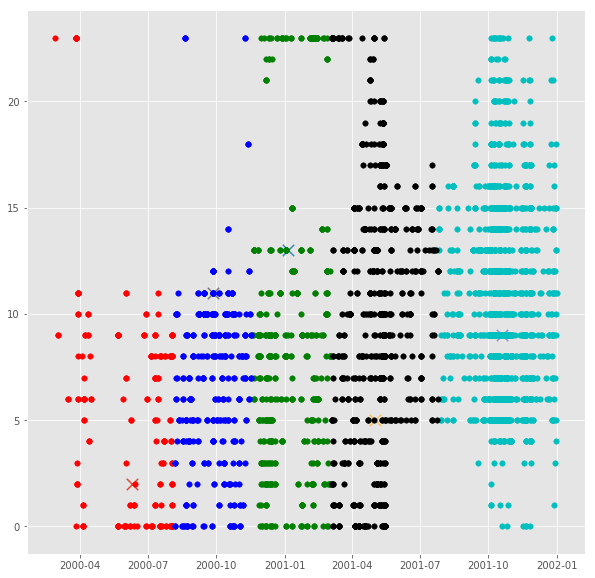

In [19]:
import sys

# create an instance of the k_means class with default parameters
k = k_Means()
data = k.parseData('example.csv')

print("Data is read in")

data = k.splitData(data)

print("Data is split")

k.initializeCentroids(data)

print("centroids are initialized")

k.km_iterations(data)

print("working on plotting")

k.plot()

When looking at our results we can easily see that the amount of emails being sent increases drastically as the scandal date of late 2001 comes closer. Simply looking at the amount of emails being sent during a few different months leading up to the scandal being revealed, you can see that during the 2000s the amount of emails slowly increases overall and you can start seeing that the hours (Y-axis) of the day start becoming more and more wide spread. Starting from left to right, when looking at the first centroid, you can see that it’s at a fairly normal level early on before the Enron scandal broke. However, there’s an interesting note that there’s quite a few of early morning emails being sent throughout all of our data, we felt like this could be due to some batch system sending out emails every morning, weekly, or maybe even monthly at early hours so it would be in the employees inboxes when they got to work. 

Continuing onto to the next centroid, we can see that there’s a drastic jump when comparing it to the first centroid, we felt like this could be due to increased questioning of how Enron was earning so much income. Maybe it caused some alarm which made some higher level employees begin emailing each other much more frequently which would cause the spike in the centroid since employees would now be emailing at later times in the day. The next centroid is around January 2001 and you can see it increase even more compared to the previous centroid, but not it didn’t quite have the same jump the previous did. Looking at the emails being sent, it seems like a fairly standard trend of simply more emails being sent out but there wasn’t an unreasonable spike in the amount. The next centroid around April 2001 actually shows a drop in the time of the emails being sent. We believe there was a very large increase in emails being sent especially during the morning hours that caused the centroid to be more focused at an earlier time of day. Even though there was an easy to see increase during later hours as well, which we believe was more higher management level employees communicating after hours. 

The last centroid was the real doozy. Comparing it to previous centroids and the data associated, you can clearly see there’s a huge increase in the overall amount of emails being sent as well as the times throughout the day they’re being sent. With the scandal coming out in December 2001, this data really shows the panic of how and when people were communicating. It’s important to see how frequent and often the upper level management on Enron was in communication trying to prepare for the scandal and the bankruptcy their company was about to go through. Even when looking at the aftermath during January 2002, you can see there’s a massive decrease in emails and that the company is about to shut down for good. 

## Conclusions

This project really taught us a lot about learning to implement machine learning algorithms like K Means Clustering, and then continuing to analyze our results and determine if we found any patterns or reasoning for the results being the way they are. We learned to preprocess fairly unorganized data by utilizing libraries to help make our lives easier and being able to grab only the pieces of the emails that we wanted. Making our own csv file to process the data we wanted help us out a lot when using pandas to organize our data in a way for us to manipulate and use for our algorithms. When using K Means Clustering we found out how to implement it ourselves and then graph our results. Using our resulting graphs and accompanying centroids, we then analyzed our graphs to try and find some patterns and correlations between the amount of emails being sent per hour within Enron and found out that there was a definite increase in the amount of emails as the timeline towards the scandal began closing in. 

Preprocessing our data set was a bit of a challenge. Our data set was very large, had over 1,000 subfolders to dig through, and was unlabeled. Working around these issues required a preprocessing step unlike what we had previous experienced in our other programs for this course. Rather than just using pandas to read a csv, we had to first parse through the data, grab what we needed, and then write it to a csv that we could read for our K-means algorithm. 

In addition, even after parsing it before hand, the data we thought we wanted at the beginning is not necessarily what we used in the end. After realizing K-means works much better with numerical values than strings, we decided to not use the to and from email addresses anymore. If we had more time to write custom difference and average methods for the email addresses, this would have been an interesting sector to explore with K-means. Clustering based on email addresses would be a future implementation for this project.

Adding to the difficulty of K-means on non-numerical values, applying K-means to datetime objects was an unexpected hurdle. Not being able to just straight add two dates together makes sense logically, but made this project much more difficult. We definitely had to get creative in our implementations of differences and averages between two dates, but in order to analyze the relationship we wanted between date and hour of email sent, it was a necessary evil. 

Finally, the last challenge was running K-means on such a large dataset. After waiting hours for our algorithm to run and plot, we decided to lower the dataset down to a subset of a little over 3,000 emails rather than using the dataset in its entirety. 

With the amount of time that was given for the project, as a group we decided that we were going to use K-Means to analyze outliers in the email database and see how that would correlate to the timeline of Enron and their inevitable downfall. The original plan was to also include Natural Language Processing (NLP) to also analyze the individual email text to determine the type of email that was being sent. As in if the emails were positive or negative. With all this in mind, we set out and mapped our project as such to fit all that we could in the final weeks of the semester. 
We realized soon that as a group we bit off far too much than we could handle. Because of other projects and finals around the corner, the project goal had to pivot to something that was easier to handle. This meant, after much deliberation, that the goal of analyzing the data set using NLP had to go. After removing NLP from our project, the goal of analyzing the dataset using K-Means was easier to handle. We were disappointed that we were not able to also include the NLP aspect of the project with the time that we were given with working around all other projects, but nonetheless satisfied with what we were able to accomplish.

### References

* “6 Fun Machine Learning Projects for Beginners.” EliteDataScience, 8 Apr. 2018,(elitedatascience.com/machine-learning-projects-for-beginners#stock-prices).
* Baraldi, Mauro. “Converting Datetime to Timedelta so They Can Be Added.” Stack Overflow, 
23 Mar. 2015, (stackoverflow.com/questions/29221334/converting-datetime-to-timedelta-so-they-can-be-added).
* Choudhary, Pramit. “Introduction to Anomaly Detection.” DataScience.com,(www.datascience.com/blog/python-anomaly-detection).
* “Enron Email Network.” Wolfram Research Data Repository, doi:10.24097/wolfram.57786.data.
* “Implementing K Means Clustering from Scratch - in Python.” The Nadig Blog, 4 Mar. 2017, (madhugnadig.com/articles/machine-learning/2017/03/04/implementing-k-means-clustring-from-scratch-in-python.html).
* Mele, Marina. “13 Useful Tips about Python Datetime Objects.” Marina Mele's Site, 19 June 2015, (www.marinamele.com/2014/03/13-useful-tips-about-python-datetime.html).
* Nadig, Madhu G. “Madhug-Nadig/Machine-Learning-Algorithms-from-Scratch.” GitHub, 10 June 2017, (github.com/madhug-nadig/Machine-Learning-Algorithms-from-Scratch/blob/master/K%20Means%20Clustering.py).
* “Public Record of Enron Mail and Email Archive.” Public Record of Enron Mail and Email Archive, (www.enron-mail.com/).
* Tiwari, Shantnu. “Shantnu/Enron-Data-Set.” GitHub, 10 Jan. 2016, (github.com/shantnu/Enron-Data-Set).
* Waite, Paul D. “Days between Two Dates in Python.” Stack Overflow, 26 Apr. 2017, (stackoverflow.com/questions/8258432/days-between-two-dates-in-python).
* Wielicki, Jonas. “How to Convert Integer into Date Object Python?” Stack Overflow, 17 Mar. 2012, (stackoverflow.com/questions/9750330/how-to-convert-integer-into-date-object-python).